 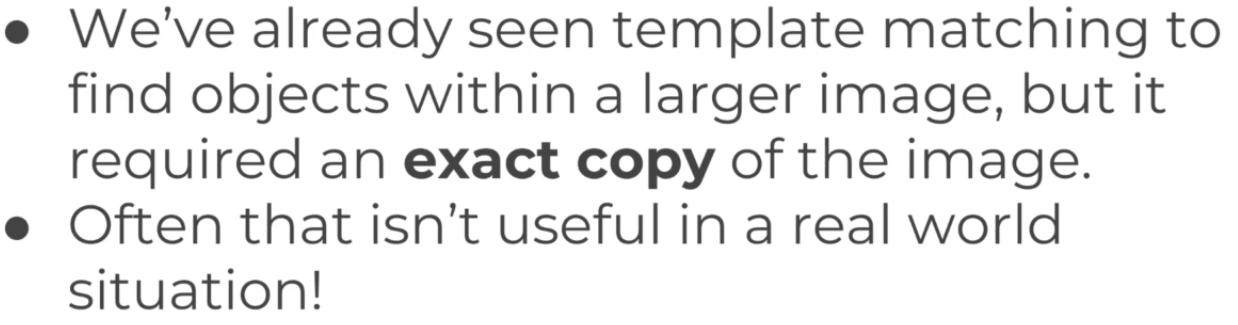

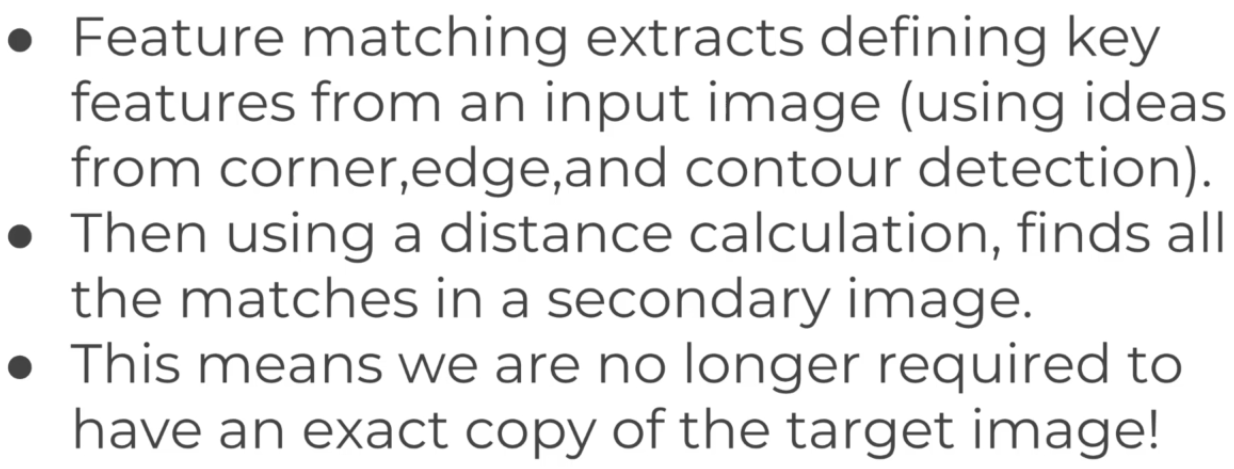

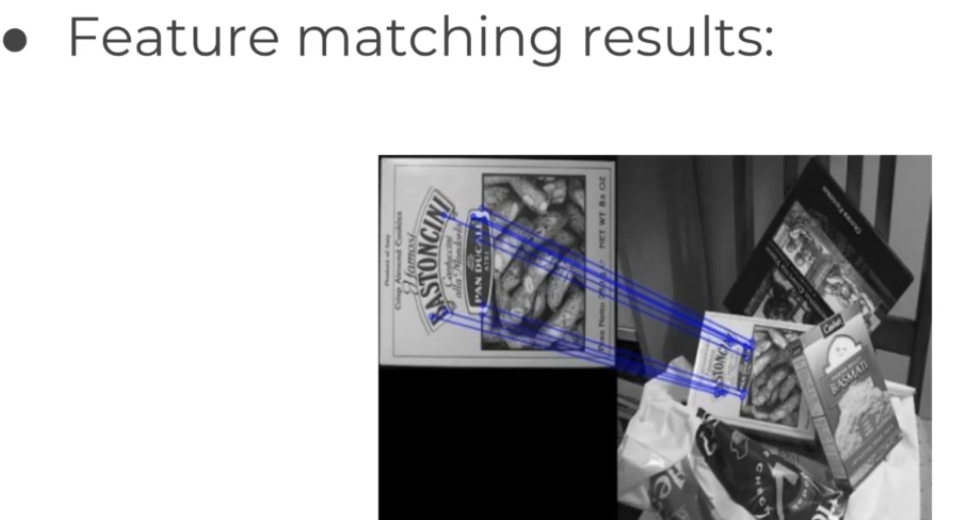`
* On the left we have the target image that we are looking for in the original image.
* On the right we can see that the image we are looking for is rotated.
* With the feature matching techinque we can find the key features and find where they exist in the second image.

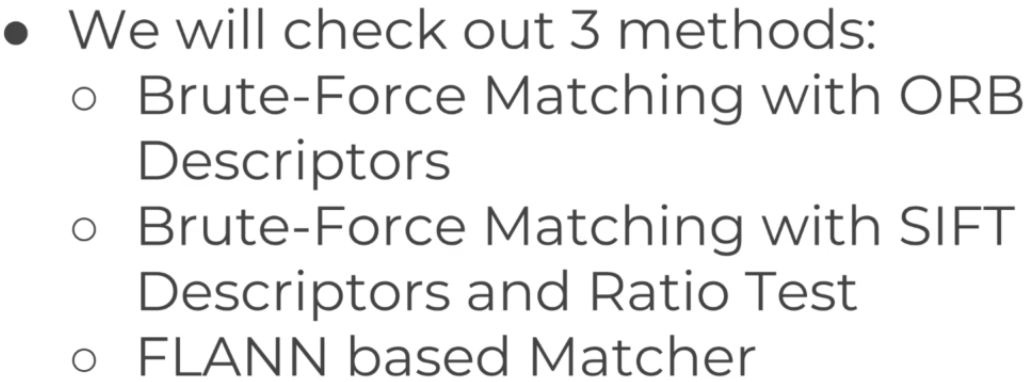

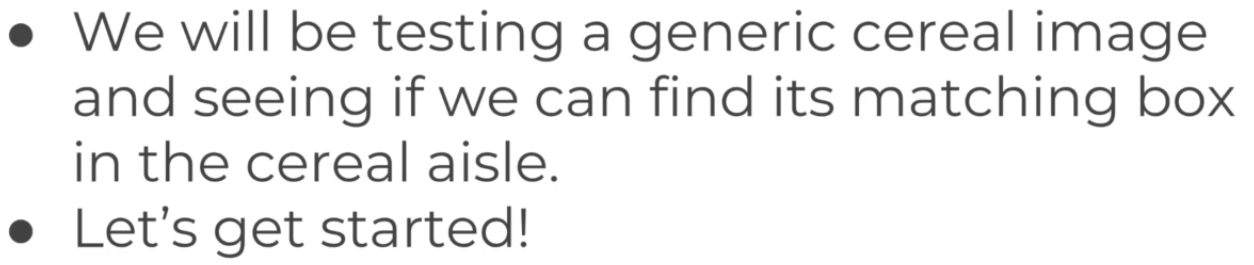

In [269]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [270]:
def disp(img,cmap = 'gray'):
    f = plt.figure(figsize = (12,12))
    ax = f.add_subplot(111)
    ax.imshow(img,cmap = 'gray')

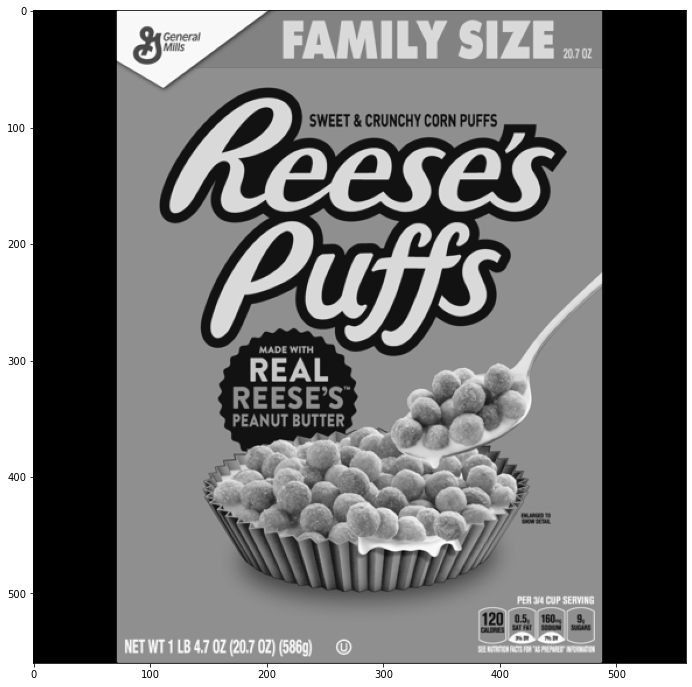

In [271]:
sml = cv.imread('../Data/reeses_puffs.png',0)
disp(sml)

* We can see that the target is at the bottom left corner.
* The **sml** image is family size of what we are trying to find in the **lrg** image.
* While the below image is having the small size of reese's puffs but some of the boxes are having family size tag on them that can affect our feature matching.

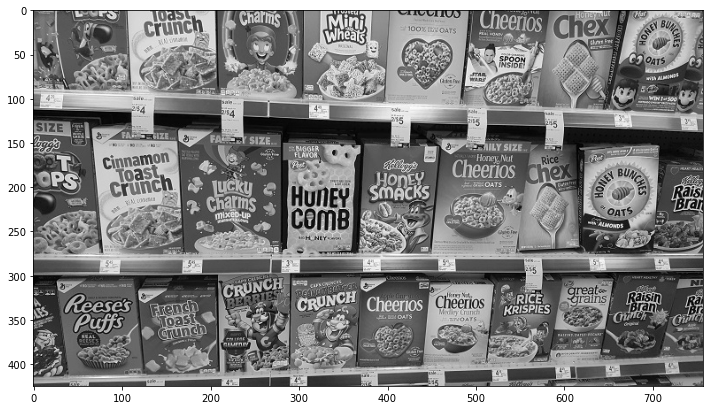

In [272]:
lrg = cv.imread('../Data/many_cereals.jpg',0)
disp(lrg)

# <center>BRUTE FORCE FEATURE MATCHING<center/>

# cv::ORB::create
$$cv.ORB.create(	[, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]	) ->retval$$

* **nfeatures**	: The maximum number of features to retain.
* **scaleFactor**	: Pyramid decimation ratio, greater than 1. scaleFactor==2 means the classical pyramid, where each next level has 4x less pixels than the previous, but such a big scale factor will degrade feature matching scores dramatically. On the other hand, too close to 1 scale factor will mean that to cover certain scale range you will need more pyramid levels and so the speed will suffer.
* **nlevels**	: The number of pyramid levels. The smallest level will have linear size equal to input_image_linear_size/pow(scaleFactor, nlevels - firstLevel).
* **edgeThreshold**	This is size of the border where the features are not detected. It should roughly match the patchSize parameter.
* **firstLevel**	: The level of pyramid to put source image to. Previous layers are filled with upscaled source image.
* **WTA_K**	: The number of points that produce each element of the oriented BRIEF descriptor. The default value 2 means the BRIEF where we take a random point pair and compare their brightnesses, so we get 0/1 response. Other possible values are 3 and 4. For example, 3 means that we take 3 random points (of course, those point coordinates are random, but they are generated from the pre-defined seed, so each element of BRIEF descriptor is computed deterministically from the pixel rectangle), find point of maximum brightness and output index of the winner (0, 1 or 2). Such output will occupy 2 bits, and therefore it will need a special variant of Hamming distance, denoted as NORM_HAMMING2 (2 bits per bin). When WTA_K=4, we take 4 random points to compute each bin (that will also occupy 2 bits with possible values 0, 1, 2 or 3).
* **scoreType**	: The default HARRIS_SCORE means that Harris algorithm is used to rank features (the score is written to KeyPoint::score and is used to retain best nfeatures features); FAST_SCORE is alternative value of the parameter that produces slightly less stable keypoints, but it is a little faster to compute.
* **patchSize**	: size of the patch used by the oriented BRIEF descriptor. Of course, on smaller pyramid layers the perceived image area covered by a feature will be larger.
* **fastThreshold**	: the fast threshold

# cv::BFMatcher::create
$$cv.BFMatcher.create(	[, normType[, crossCheck]]	) ->	retval$$

* **normType** :	One of NORM_L1, NORM_L2, NORM_HAMMING, NORM_HAMMING2. L1 and L2 norms are preferable choices for SIFT and SURF descriptors, NORM_HAMMING should be used with ORB, BRISK and BRIEF, NORM_HAMMING2 should be used with ORB when WTA_K==3 or 4 (see ORB::ORB constructor description).
* **crossCheck** :	If it is false, this is will be default BFMatcher behaviour when it finds the k nearest neighbors for each query descriptor. If crossCheck==true, then the knnMatch() method with k=1 will only return pairs (i,j) such that for i-th query descriptor the j-th descriptor in the matcher's collection is the nearest and vice versa, i.e. the BFMatcher will only return consistent pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches. This is alternative to the ratio test, used by D. Lowe in SIFT paper.

# cv::drawMatches
$$cv.drawMatches(	img1, keypoints1, img2, keypoints2, matches1to2, outImg, matchesThickness[, matchColor[, singlePointColor[, matchesMask[, flags]]]]	) ->	outImg$$

* **img1** :	First source image.
* **keypoints1** :	Keypoints from the first source image.
* **img2** :	Second source image.
* **keypoints2** :	Keypoints from the second source image.
* **matches1to2** :	Matches from the first image to the second one, which means that keypoints1[i] has a corresponding point in * **keypoints2** :[matches[i]] .
* **outImg** :	Output image. Its content depends on the flags value defining what is drawn in the output image. See possible flags bit values below.
* **matchColor** :	Color of matches (lines and connected keypoints). If matchColor==Scalar::all(-1) , the color is generated randomly.
* **singlePointColor** :	Color of single keypoints (circles), which means that keypoints do not have the matches. If singlePointColor==Scalar::all(-1) , the color is generated randomly.
* **matchesMask** :	Mask determining which matches are drawn. If the mask is empty, all matches are drawn.
* **flags** :	Flags setting drawing features. Possible flags bit values are defined by DrawMatchesFlags.

* First we will create orb object

In [332]:
orb = cv.ORB_create()

* We then call detectandcompute() function of orb that takes image and a mask(we dont need any mask here so NONE)
* Function returns keypoints and descriptors.
* d1 and d2 are just values where it found the features.

In [333]:
k1,d1 = orb.detectAndCompute(sml,None)
k2,d2 = orb.detectAndCompute(lrg,None)

* Now we will use bruteforce matcher OR BFMatcher with default parameters.

In [334]:
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
# bf = cv.BFMatcher() # both will work the same since the parameters are default anyway.

In [279]:
len(matches)

139

* Then we pass the descriptors in the function of BFMatcher.match()

In [335]:
matches = bf.match(d1,d2)

* The match function returns **match objects** and eah objects has a distance attribute.
* The distance attribute clarifies how good of a match this object is.
* The less distance it has the better match it is.

In [336]:
# we sorted the matches list by distance attribute using lambda expression
matches = sorted(matches , key=lambda x:x.distance)

In [337]:
# The length of matches is,
len(matches)

139

* Now lets draw those sorted matches.

In [338]:
# lets see only initial 10 matches
final = cv.drawMatches(sml,k1,lrg,k2,matches[:10],None,flags = 2)

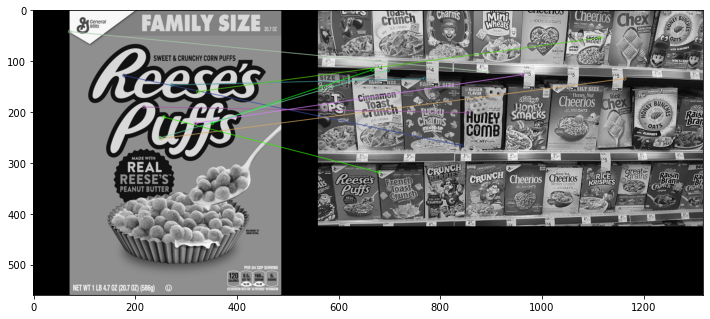

In [339]:
disp(final)

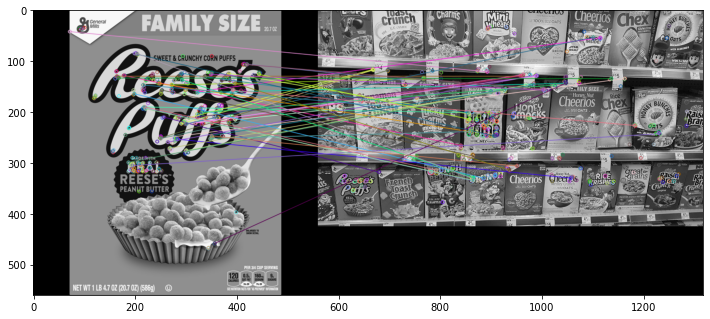

In [340]:
# lets see only initial 50 matches
final1 = cv.drawMatches(sml,k1,lrg,k2,matches[:50],None)
disp(final1)

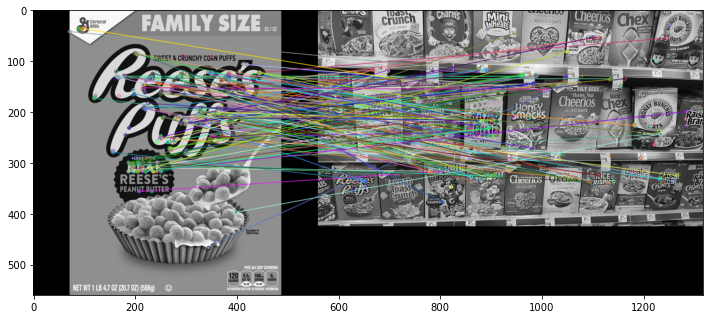

In [342]:
# lets see only initial 50 matches
final1 = cv.drawMatches(sml,k1,lrg,k2,matches,None)
disp(final1)

* We can see that this alogrithm does not really work with this image espacially if the target image does not look like the main image.
* First thing is our target image is having a **Family Size** tag which our main image in does not.
* Secondly the main image is kinda distorted.

# <center>SCALE INVARIANT FEATURE TRANSFOMRATION(SIFT) FEATURE MATCHING<center/>
* This does really when we are dealing with images like above where the image sizes are at different scales.

# cv::SIFT::create
$$	cv.SIFT.create(	nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma, descriptorType	) ->	retval$$
* **nfeatures** :	The number of best features to retain. The features are ranked by their scores (measured in SIFT algorithm as the local contrast)
* **nOctaveLayers** :	The number of layers in each octave. 3 is the value used in D. Lowe paper. The number of octaves is computed automatically from the image resolution.
* **contrastThreshold** :	The contrast threshold used to filter out weak features in semi-uniform (low-contrast) regions. The larger the threshold, the less features are produced by the detector.
* **edgeThreshold** :	The threshold used to filter out edge-like features. Note that the its meaning is different from the contrastThreshold, i.e. the larger the edgeThreshold, the less features are filtered out (more features are retained).
* **sigma** :	The sigma of the Gaussian applied to the input image at the octave #0. If your image is captured with a weak camera with soft lenses, you might want to reduce the number.

In [361]:
sift = cv.SIFT_create()

In [362]:
k1,d1 = sift.detectAndCompute(sml,None)
k2,d2 = sift.detectAndCompute(lrg,None)

In [363]:
bf = cv.BFMatcher()

* using knnMatch and setting k = 2 we are finding the 2 best matches for each discriptor.

In [364]:
matches = bf.knnMatch(d1,d2,k = 2)

In [365]:
len(matches)

1501

* We can see that each array is having 2 values as our k was 2. 
* The second value is better match than first value. 
* If we had k = 3 then the third value would be better than the first and second value.
* If the distance between k = 2 i.e two matches is smallest then its prolly a very good feature to match on.
* Lets say if we have strong match in the first column and second match is far away in distance then the entire discriptor is not really considered to be good feature to match on.

In [366]:
matches[0]

(< cv2.DMatch 00000264F7CDB170>, < cv2.DMatch 00000264F7CDB150>)

In [367]:
len(matches)

1501

In [368]:
goodmatch = []

# LESS DISTANCE MEANS BETTER MATCH
# RATIO MATCH1 < 75% MATCH 2

for m1,m2 in matches:
    
    # The formula is m1.distance < 0.75*m2.distance
    if m1.distance < 0.75*m2.distance: # if match1 distance is less than 75% then that row is a good match
        goodmatch.append([m1])

In [369]:
len(matches)

1501

In [370]:
len(goodmatch)

79

In [371]:
final2 = cv.drawMatchesKnn(sml,k1,lrg,k2,goodmatch,None,flags = 2)

* We can see most of the matches are detected of our target image and family size is also detected in some boxes.

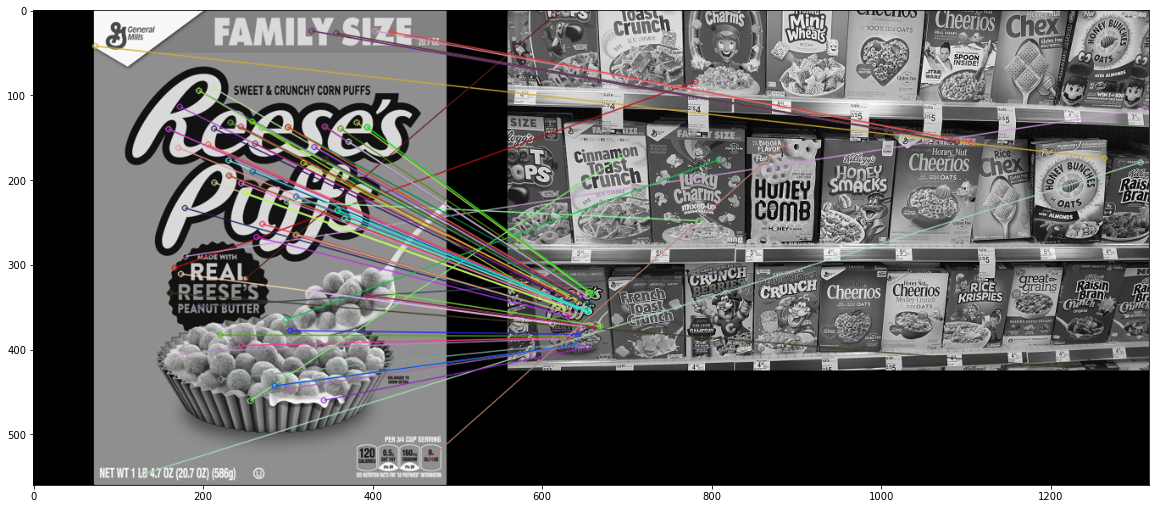

In [372]:
f = plt.figure(figsize = (20,20))
f = f.add_subplot(111)
f.imshow(final2,cmap = 'gray')

# <center>FAST LIBRARY FOR APPROXIMATE NEAREST NEIGHBOR(FLANN) FEATURE MATCHING<center/>
* This method wont find best possible matches but this will find general good matches.
* We can play with flann's parameters in order to increase precision or to improve the quality of the matches but that will slow the algorithm down.

In [378]:
sift = cv.SIFT_create()
k1,d1 = sift.detectAndCompute(sml,None)
k2,d2 = sift.detectAndCompute(lrg,None)

In [379]:
FLANN_INDEX_KDTREE = 0
index_param = dict(algorithm = FLANN_INDEX_KDTREE , trees = 5)
search_params = dict(checks = 50)

In [380]:
flann = cv.FlannBasedMatcher(index_param , search_params)

In [383]:
matches = flann.knnMatch(d1,d2,k = 2)

In [384]:
len(matches)

1501

In [385]:
goodmatch = []

# LESS DISTANCE MEANS BETTER MATCH
# RATIO MATCH1 < 75% MATCH 2

for m1,m2 in matches:
    
    # The formula is m1.distance < 0.75*m2.distance
    if m1.distance < 0.7*m2.distance: # if match1 distance is less than 75% then that row is a good match
        goodmatch.append([m1])

In [386]:
len(goodmatch)

67

* On flags = 0 it will show us all the points it matched on except only draw lines on the best ones.
* On flags = 1 we can see those lines.

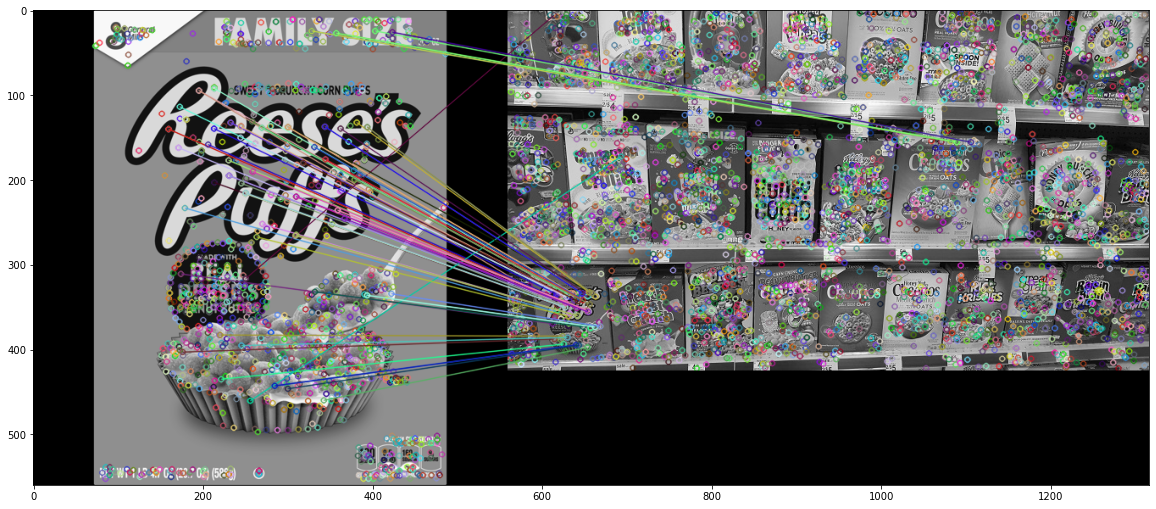

In [391]:
final = cv.drawMatchesKnn(sml,k1,lrg,k2,goodmatch,None,flags = 0)
f = plt.figure(figsize = (20,20))
f = f.add_subplot(111)
f.imshow(final,cmap = 'gray')

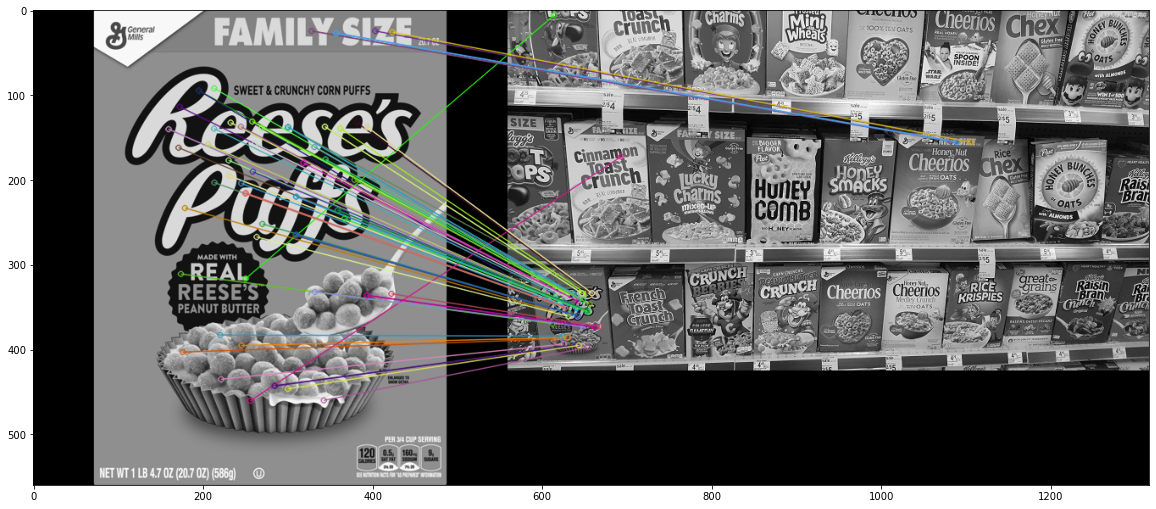

In [390]:
final = cv.drawMatchesKnn(sml,k1,lrg,k2,goodmatch,None,flags = 2)
f = plt.figure(figsize = (20,20))
f = f.add_subplot(111)
f.imshow(final,cmap = 'gray')

# <center>To Color Point & Lines<center/>

In [399]:
sift = cv.SIFT_create()
k1,d1 = sift.detectAndCompute(sml,None)
k2,d2 = sift.detectAndCompute(lrg,None)

In [400]:
FLANN_INDEX_KDTREE = 0
index_param = dict(algorithm = FLANN_INDEX_KDTREE , trees = 5)
search_params = dict(checks = 50)

In [401]:
flann = cv.FlannBasedMatcher(index_param , search_params)
matches = flann.knnMatch(d1,d2,k = 2)

In [402]:
mMask = [[0,0] for i in range(len(matches))]

In [404]:
goodmatch = []

# LESS DISTANCE MEANS BETTER MATCH
# RATIO MATCH1 < 75% MATCH 2

for i,(m1,m2) in enumerate(matches):
    
    # The formula is m1.distance < 0.75*m2.distance
    if m1.distance < 0.7*m2.distance: # if match1 distance is less than 75% then that row is a good match
        mMask[i] = [1,0]

In [406]:
draw_params = dict(matchColor = (255,0,0), singlePointColor = (0,0,255),matchesMask = mMask,flags = 0)

In [407]:
final = cv.drawMatchesKnn(sml,k1,lrg,k2,matches,None,**draw_params)

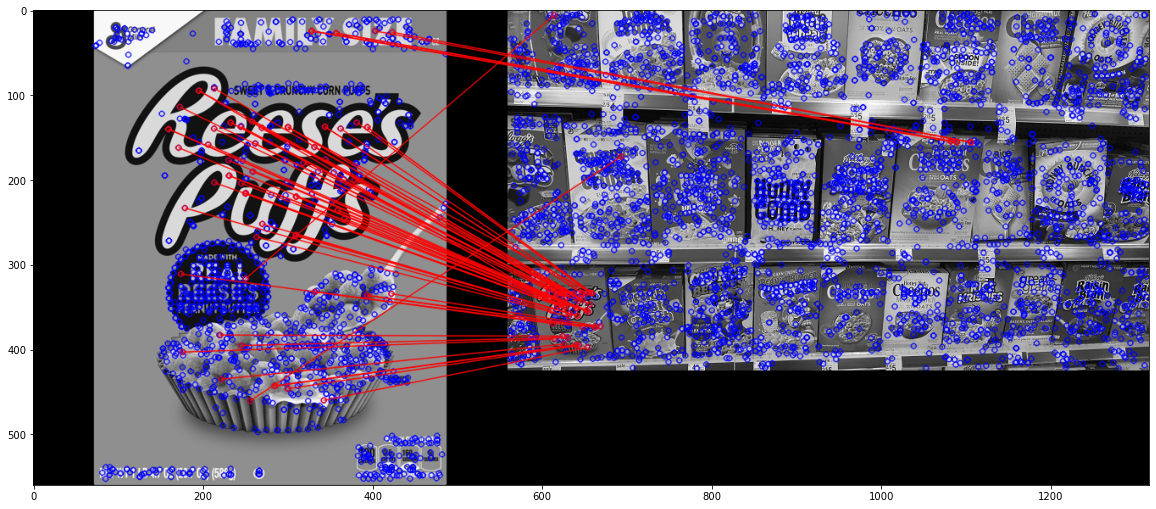

In [408]:
f = plt.figure(figsize = (20,20))
f = f.add_subplot(111)
f.imshow(final,cmap = 'gray')